# COVID Project

## 데이터 분석 처리 절차
 - 문제의 정의
 - 데이터 수집
 - 데이터 전처리 및 가공
 - 데이터 시각화 및 통찰 도출
 

# 문제의 정의
 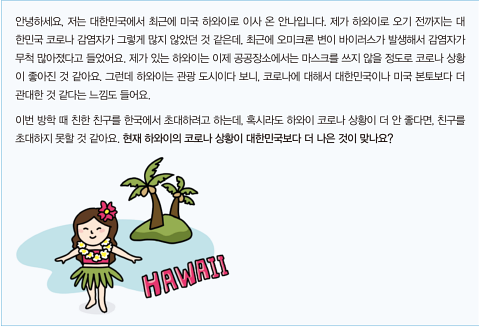

## 기대 결과
- 대한민국과 하와이의 확진자 현황을 보여주는 그래프 생성
- 일자별 총 인구 대비 확진자 수 비율의 변화 추이

# 데이터 수집

## 적절한 데이터 인가?
- 포괄성 : 필요한 데이터를 포함하고 있는가?
- 최신성 : 최신 데이터를 포함하고 있는가?
- 정확성 : 정확한 데이터를 포함하고 있는가?
- 일관성 : 데이터의 형태가 일관되어 있는가?
- 신뢰성 : 왜곡이 없고 신뢰할 수 있는 데이터 인가?
- 사용성 : 사용하기 편리한가?

## 데이터의 검색 및 다운로드
- Google에서 OWID(Our World in Data, https://ourworldindata.org/ )검색
- Main page의 상단 Explore Our COVID-19 Data
- 왼쪽 상단 COVID-19 dataset 클릭
- Github, README.md 파일에 Download our complete COVID-19 dataset에서 CSV 클릭
- owid-covid-data.csv 


# 데이터 전처리 및 가공

## 데이터 읽어 오기

In [2]:
import pandas as pd

pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 37ea63d540fd27274cad6585082c91b1283f963d
python           : 3.11.3.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 22.4.0
Version          : Darwin Kernel Version 22.4.0: Mon Mar  6 21:00:41 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T8103
machine          : arm64
processor        : arm
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 2.0.1
numpy            : 1.24.3
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 23.0.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : None
IPython          : 8.13.2
pandas_datareader: None
bs4              : None
bot

/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
#Google Drive에 연결 : 왼쪽 폴더 이미지 클릭 

!pwd

/Users/user/Documents/GitHub/Pandas_DataAnalysis


In [4]:
# CSV파일 읽어 오기
# 읽어 오려는 파일 오른쪽 클릭해서 '경로복사'

raw_df = pd.read_csv('owid-covid-data.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244337 entries, 0 to 244336
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    244337 non-null  object 
 1   continent                                   230598 non-null  object 
 2   location                                    244337 non-null  object 
 3   date                                        244337 non-null  object 
 4   total_cases                                 230319 non-null  float64
 5   new_cases                                   230041 non-null  float64
 6   new_cases_smoothed                          228842 non-null  float64
 7   total_deaths                                210886 non-null  float64
 8   new_deaths                                  210803 non-null  float64
 9   new_deaths_smoothed                         209617 non-null  float64
 

In [5]:
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
raw_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
244332,ZWE,Africa,Zimbabwe,2022-12-17,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244333,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244334,ZWE,Africa,Zimbabwe,2022-12-19,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244335,ZWE,Africa,Zimbabwe,2022-12-20,259981.0,625.0,89.286,5637.0,15.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244336,ZWE,Africa,Zimbabwe,2022-12-21,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


## 원하는 열 추려내기

### 열 항목 확인 및 수정된 데이터 프레임 생성
- iso_code : 국제 표준 국가 코드
- location : 국가 이름
- date : 일자
- total_cases : 전체 확진자 수
- population : 인구

In [7]:
#원하는 열 list만들기 (df : data frame)
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

#원하는 열을 추출한 데이터프레임 생성
revised_df = raw_df[selected_columns]

#수정된 데이터프레임 확인
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,41128772.0
1,AFG,Afghanistan,2020-02-25,5.0,41128772.0
2,AFG,Afghanistan,2020-02-26,5.0,41128772.0
3,AFG,Afghanistan,2020-02-27,5.0,41128772.0
4,AFG,Afghanistan,2020-02-28,5.0,41128772.0


### 유일한 데이터 추출

- Method : unique()

In [8]:
# location 열 추출
location = raw_df['location']
location

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
244332       Zimbabwe
244333       Zimbabwe
244334       Zimbabwe
244335       Zimbabwe
244336       Zimbabwe
Name: location, Length: 244337, dtype: object

In [9]:
#location열의 유일한 값 확인
location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [10]:
kor_total_df = raw_df[raw_df.location=='South Korea']
kor_total_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203696,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203697,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203698,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203699,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203700,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,43.4,0.17,2.47,0.837582


In [11]:
## South Korea 데이터 프레임 생성

kor_df = revised_df[revised_df.location=='South Korea']

kor_df.head()

,iso_code,location,date,total_cases,population
203696,KOR,South Korea,2020-01-22,1.0,51815808.0
203697,KOR,South Korea,2020-01-23,1.0,51815808.0
203698,KOR,South Korea,2020-01-24,2.0,51815808.0
203699,KOR,South Korea,2020-01-25,2.0,51815808.0
203700,KOR,South Korea,2020-01-26,3.0,51815808.0


In [12]:
## United States 데이터 프레임 생성

usa_df = revised_df[revised_df.location=='United States']

usa_df.head()

,iso_code,location,date,total_cases,population
229641,USA,United States,2020-01-22,1.0,338289856.0
229642,USA,United States,2020-01-23,1.0,338289856.0
229643,USA,United States,2020-01-24,2.0,338289856.0
229644,USA,United States,2020-01-25,2.0,338289856.0
229645,USA,United States,2020-01-26,5.0,338289856.0


### index 변경
- Method : set_index()

In [13]:
# date로 index변경

kor_date_index_df = kor_df.set_index('date')
usa_date_index_df = usa_df.set_index('date')


In [14]:
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51815808.0
2020-01-23,KOR,South Korea,1.0,51815808.0
2020-01-24,KOR,South Korea,2.0,51815808.0
2020-01-25,KOR,South Korea,2.0,51815808.0
2020-01-26,KOR,South Korea,3.0,51815808.0


In [15]:
usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,338289856.0
2020-01-23,USA,United States,1.0,338289856.0
2020-01-24,USA,United States,2.0,338289856.0
2020-01-25,USA,United States,2.0,338289856.0
2020-01-26,USA,United States,5.0,338289856.0


# 데이터 시각화
- Pandas chart visualization 참조
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


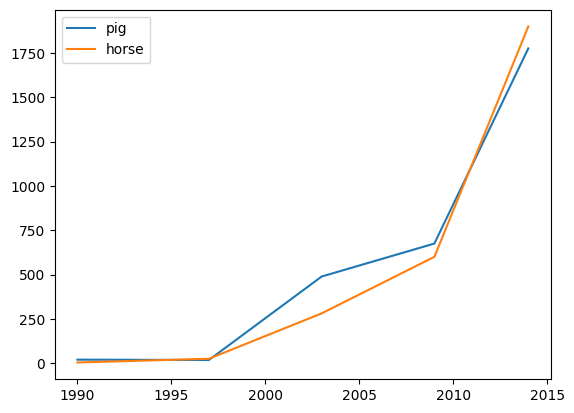

In [16]:
# 그래프 작성 예

df = pd.DataFrame({
    'pig' : [20, 18, 489, 675, 1776],
    'horse' : [4, 25, 281, 600, 1900],
    }, index=[1990, 1997, 2003, 2009, 2014])

lines = df.plot.line()

In [17]:
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-12-17    28188293.0
2022-12-18    28214915.0
2022-12-19    28302474.0
2022-12-20    28390646.0
2022-12-21    28466390.0
Name: total_cases, Length: 1065, dtype: float64

In [18]:
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22            1.0
2020-01-23            1.0
2020-01-24            2.0
2020-01-25            2.0
2020-01-26            5.0
                 ...     
2022-12-17     99898101.0
2022-12-18     99903000.0
2022-12-19     99960973.0
2022-12-20    100014301.0
2022-12-21    100184506.0
Name: total_cases, Length: 1065, dtype: float64

In [19]:
final_df = pd.DataFrame({
    'KOR' : kor_total_cases,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_df.head()

,KOR,USA
date,,
2020-01-22,1.0,1.0
2020-01-23,1.0,1.0
2020-01-24,2.0,2.0
2020-01-25,2.0,2.0
2020-01-26,3.0,5.0


<Axes: xlabel='date'>

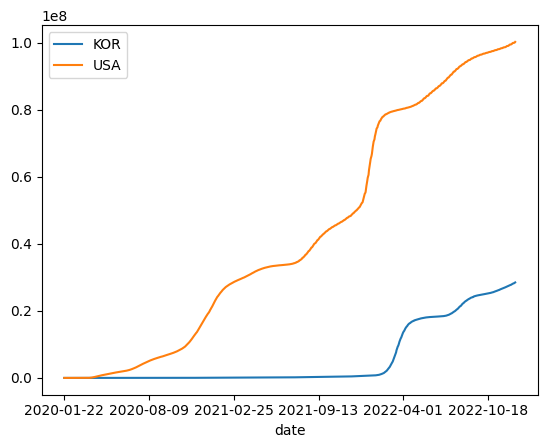

In [20]:
# .plot.line() 함수를 이용해서 선 그래프 그리기
final_df.plot.line()

<Axes: xlabel='date'>

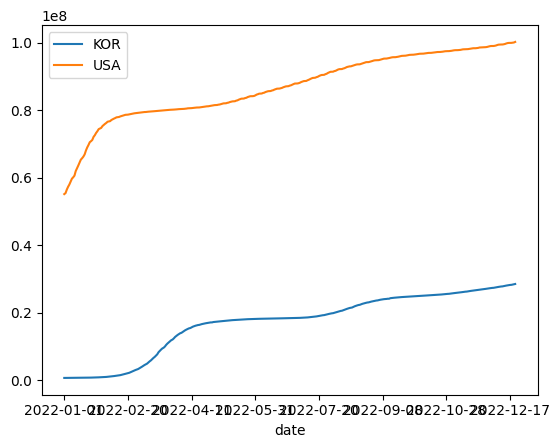

In [21]:
#원하는 X축의 범쉬 설정 : 슬라이싱
final_df['2022-01-01':].plot.line()

<Axes: xlabel='date'>

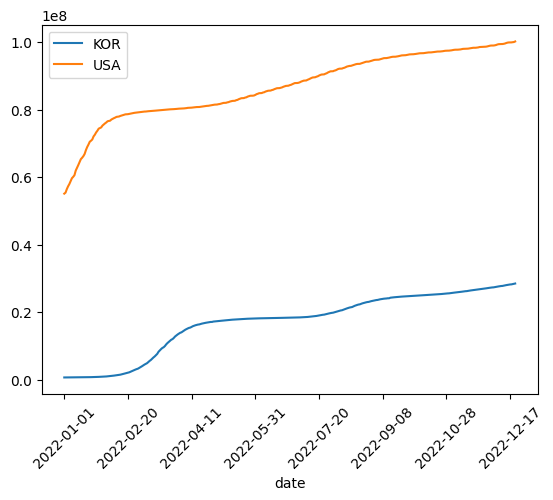

In [22]:
# X축에 각도 넣기
final_df['2022-01-01':].plot.line(rot=45)

## 확진자 비율 구하기

In [23]:
kor_population = kor_date_index_df['population']['2020-01-22']

usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population, ') / 대한민국 인구(', kor_population, ')')

미국 인구( 338289856.0 ) / 대한민국 인구( 51815808.0 )


In [24]:
# 인구비율 구하기

rate = round((usa_population/kor_population), 2)
rate

6.53

In [25]:
#확진자 비율을 적용한 최종 데이터 프레임 생성

final_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * rate,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_revised_df.head()

,KOR,USA
date,,
2020-01-22,6.53,1.0
2020-01-23,6.53,1.0
2020-01-24,13.06,2.0
2020-01-25,13.06,2.0
2020-01-26,19.59,5.0


<Axes: xlabel='date'>

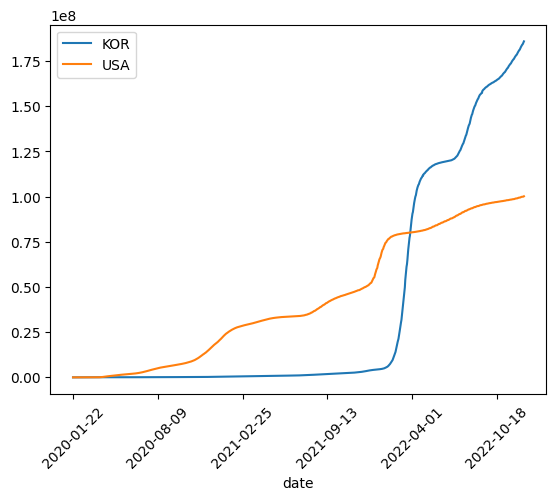

In [26]:
final_revised_df[:].plot.line(rot=45)

<Axes: xlabel='date'>

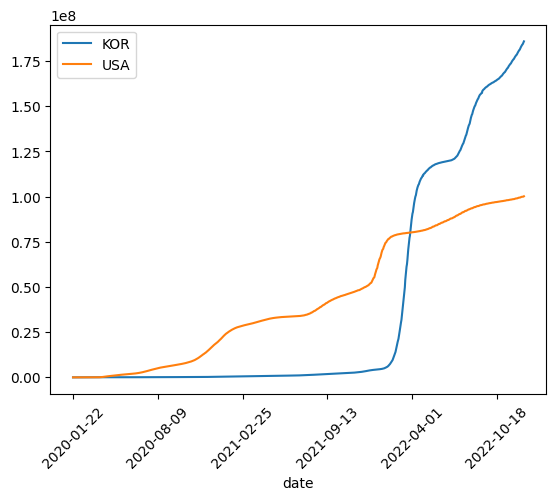

In [27]:
final_revised_df['2020-01-01':].plot.line(rot=45)

# 과제

1. ch4 연습문제 풀이

In [28]:
raw_hawaii_df = pd.read_csv('hawaii_coviddate.csv')
raw_hawaii_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,06/17/2021,HI,35862,NaN,NaN,31,0.0,504,NaN,NaN,0,0.0,06/18/2021 01:48:26 PM,Not agree,Not agree
1,12/30/2021,HI,106350,NaN,NaN,3425,368.0,1074,NaN,NaN,0,0.0,12/31/2021 02:32:16 PM,Not agree,Not agree
2,11/12/2020,HI,16171,NaN,NaN,94,0.0,221,NaN,NaN,0,0.0,11/13/2020 02:54:34 PM,Not agree,Not agree
3,11/10/2020,HI,15961,NaN,NaN,69,0.0,221,NaN,NaN,1,0.0,11/11/2020 03:15:25 PM,Not agree,Not agree
4,07/23/2021,HI,38499,NaN,NaN,215,5.0,524,NaN,NaN,0,0.0,07/24/2021 02:21:11 PM,Not agree,Not agree


In [29]:
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  1001 non-null   object 
 1   state            1001 non-null   object 
 2   tot_cases        1001 non-null   int64  
 3   conf_cases       0 non-null      float64
 4   prob_cases       0 non-null      float64
 5   new_case         1001 non-null   int64  
 6   pnew_case        958 non-null    float64
 7   tot_death        1001 non-null   int64  
 8   conf_death       0 non-null      float64
 9   prob_death       0 non-null      float64
 10  new_death        1001 non-null   int64  
 11  pnew_death       912 non-null    float64
 12  created_at       1001 non-null   object 
 13  consent_cases    1001 non-null   object 
 14  consent_deaths   1001 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 117.4+ KB
